Felipe Bartelt de Assis Pessoa - 2016026841


# Problema Não-Linearmente Separável

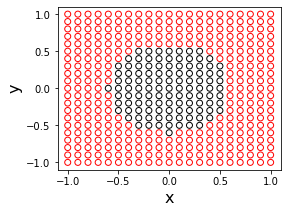

In [230]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go

x = np.linspace(-1.0,1.0,21)
y = np.linspace(-1.0,1.0,21)
p1,p2 = np.meshgrid(x,y)

colormap = np.array([
    ['#FF0000' if np.sqrt(elem**2+p2[i,j]**2) > 0.6 else '#000000' for j, elem in enumerate(row)] for i, row in enumerate(p1)])

plt.rcParams['figure.figsize'] = (4, 3)
plt.scatter(p1, p2, color = 'none', edgecolor=colormap.flatten())
plt.xlabel('x', fontsize = 16)
plt.ylabel('y', fontsize = 16)
plt.show()



De forma a separar, linearmente, os dados da figura acima, pode-se tomar um mapeamento não linear como $z = x^2+y^2$ e traçar um plano interseccionando a superfície formada por essas 3 variáveis. A interseção é feita com base no raio do círculo, $0.6$, que divide a amostra em dois conjuntos, assim $z = 0.6^2$ é o hiperplano desejado.

Esse processo foi tomado da seguinte forma:

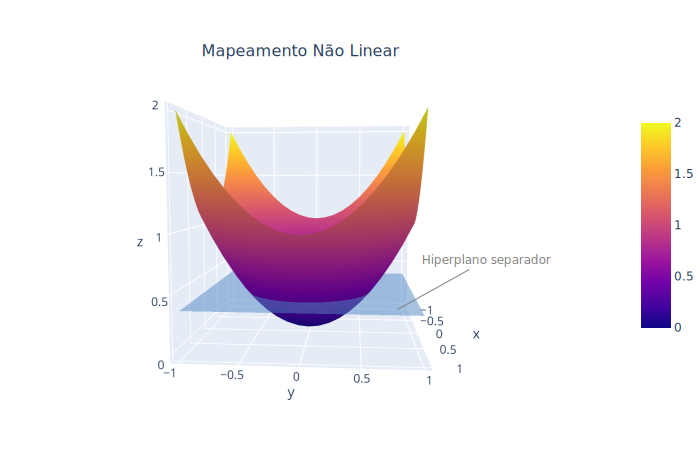

In [228]:
# Non linear mapping
z = (p1**2 + p2**2)
separador = (0.6**2)*np.ones(np.shape(z))

# Surfaces plot
surf = go.Surface(x = p1,y = p2,z = z,
                  colorbar = dict(lenmode = 'fraction', len = 0.5))
plane = go.Surface(x = p1,y = p2, z = separador, colorscale = "Ice",
                   opacity = 0.5, showscale=False)
fig = go.Figure(data = [surf,plane])

# Prettify figure
camera = dict(eye = dict(x = 2.5, y = 0.2, z = 0.2))
title = {
        'text': "Mapeamento Não Linear",
        'y':0.9,
        'x':0.43,
        'xanchor': 'center',
        'yanchor': 'top'}

annotations = [dict(
                x= 0.8,
                y= 0.8,
                z= 0.6**2,
                text="Hiperplano separador",
                textangle=0,
                ax=90,
                ay=-50,
                font=dict(
                    color="grey",
                    size=12),
                arrowcolor="grey",
                arrowsize=2,
                arrowwidth=1,
                arrowhead=0
              )]
        
# Figure
fig.update_layout(scene_camera = camera,margin=dict(l=0, r=0, t=0, b=0),
                  title=title, title_font_size = 16)
fig.update_scenes(yaxis = dict(tickangle = 0), zaxis = dict(tickangle=0), 
                  annotations = annotations)

fig.show(renderer="svg")

Para visualizar se a superfície formada realmente atende os pontos amostrados, fez-se:

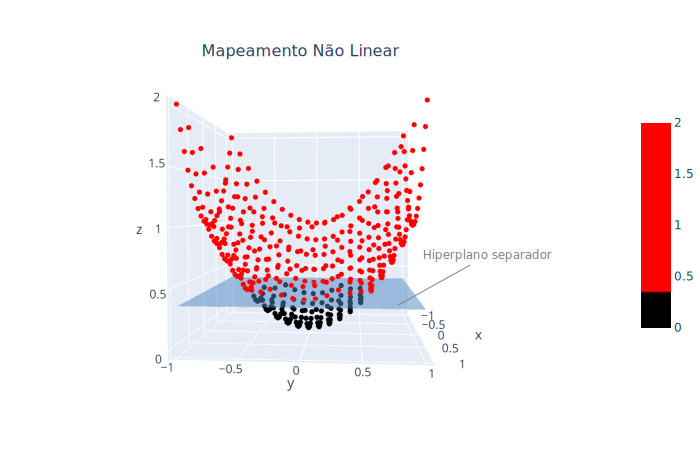

In [229]:
# Forcing a binary color map
uniq = sorted(list(set(z.flatten())))
colors = ["black" if a < 0.6**2 else "red" for a in uniq]
colorscale = list(map(list, zip(uniq/max(uniq), colors)))

# Scatter plot
scatter = go.Scatter3d(x=p1.flatten(),y=p2.flatten(),z=z.flatten(), 
                       mode = 'markers', marker = dict(size=3, 
                       color= z.flatten(), colorscale = colorscale, 
                       opacity=1, colorbar = dict(lenmode = 'fraction',
                       len=0.5)) )

# Figure
fig2 = go.Figure(data = [scatter, plane])
camera['eye']['z'] = 0.06
fig2.update_layout(scene_camera = camera, margin=dict(l=0, r=0, t=0, b=0),
                   title=title, title_font_size = 16)
fig2.update_scenes(yaxis = dict(tickangle = 0), zaxis = dict(tickangle=0), 
                   annotations = annotations)

fig2.show(renderer="svg")


A superfície gerada pela expansão dimensional parece permitir a separação do conjunto, porém ainda é viável que se avalie o planos X-Z e Y-Z de forma independente como forma de segurança. Uma vez que o plano X-Z tem a mesma aparência que o plano Y-Z, o que pode ser visto pela superfície e conjunto de amostras, plotou-se apenas o plano X-Z

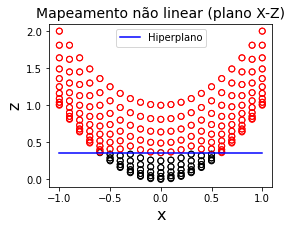

In [231]:
plt.scatter(p1, z, color = 'none', edgecolor=colormap.flatten())
plt.plot(x, 0.6**2 * np.ones(np.shape(x)), color = 'blue')
plt.title('Mapeamento não linear (plano X-Z)', fontsize = 14)
plt.xlabel('x', fontsize = 16)
plt.ylabel('z', fontsize = 16)
plt.legend(['Hiperplano'])
plt.show()

# Overfitting e Underfitting
![](/home/fbartelt/Documents/UFMG/RNA/fig_ex2.png)

O modelo azul aparenta ser o melhor aproximado da função geradora, já que não apresenta *overfitting* ou *underfitting* quando comparado aos demais.

O modelo preto apresenta menor erro de treinamento, já que sofreu *overfitting*, ou seja, interpolou os dados da amostra de entrada e assim passa perfeitamente por todos esses pontos.

O modelo azul deve apresentar melhor desempenho para dados novos, pois é a melhor aproximação da função geradora.

A imagem mostra claramente um dos problemas ao se treinar uma rede neural. É possível escolher uma complexidade baixa para representar a função geradora, tornando a aproximação envieseda, resultando em *underfitting*. Por outro lado, caso a complexidade da aproximação seja suficiente para interpolar os dados de entrada perfeitamente, tem-se alta variância e portanto *overfitting*. 

O desempenho de um algoritmo que sofre de *underfitting* não é bom até mesmo para os dados de treino, porém um algoritmo que sofre de *overfitting* tem excelente desempenho para os dados de treino, apesar disso não indicar que o algoritmo será bom para novos dados, pelo contrário, devido à alta variância, tem-se um desempenho ruim para dados novos.


# Aproximação Polinomial

Para a aproximação polinomial a partir de 10 amostras de treino, tomou-se a seguinte rotina:

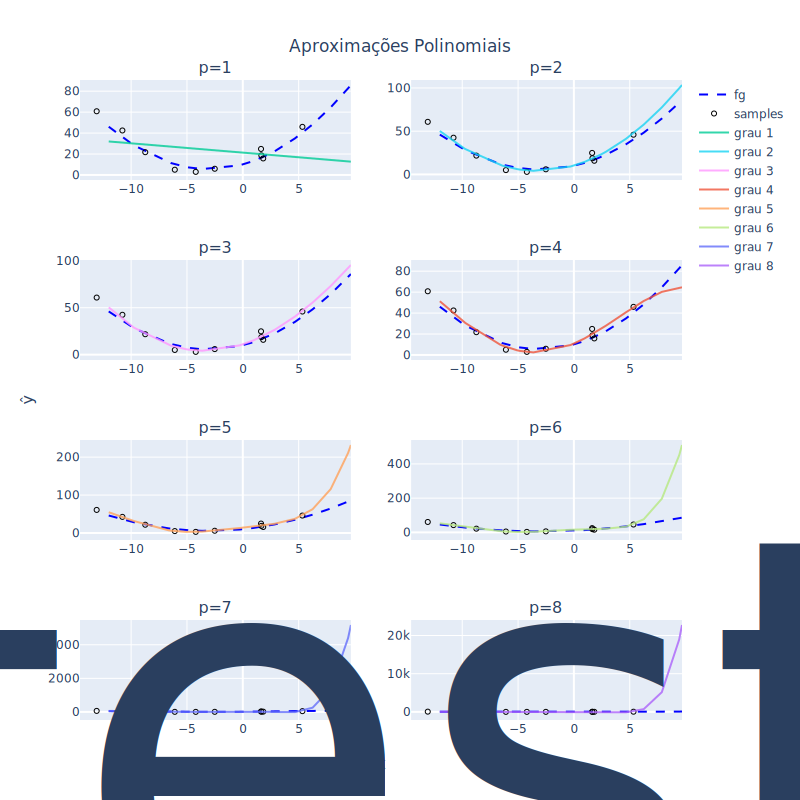

In [216]:
from plotly.subplots import make_subplots

N_train, N_test = 10, 20

def fg(x):
    return (1/2)*x**2 + 3*x + 10

x_train = np.random.default_rng().uniform(-15, 10, (N_train,1))
x_test = np.sort(np.random.default_rng().uniform(-15, 10, (N_test,1)), axis=0)

noise = np.random.default_rng().normal(0, 4, np.shape(x_train))
y_train  = fg(x_train) + noise
y_test = fg(x_test)

fig3 = make_subplots(rows=4, cols=2, y_title = 'ŷ', 
                     x_title = 'x<sub>test</sub>',
                     subplot_titles= tuple('p='+str(i) for i in range(1,9)))
fig3.update_layout(autosize = False, width = 800, height = 800,
                   margin=dict(l = 80, r = 80, t = 80, b = 80),
                   title = dict(text = 'Aproximações Polinomiais', x = 0.5,
                   y = 0.95))

# Compute approximation for n= 1,...,8 polynomial degree
for i in range(1,9):
    powers = np.arange(0, i+1)
    H = np.array(list(map(lambda x: x**powers, x_train.flatten())))
    H_pseudoinv = np.linalg.pinv(H)
    w = H_pseudoinv @ y_train
    H_test = np.array(list(map(lambda x: x**powers, x_test.flatten())))
    y_hat = H_test @ w

    # Plot fg, samples and y_hat
    fg_plot = go.Scatter(x = x_test.flatten(), y = y_test.flatten(), 
                         mode='lines', name = 'fg', 
                         line = dict(color = 'blue', dash = 'dash'), 
                         showlegend= (i==1) )
    sample = go.Scatter(x = x_train.flatten(), y=y_train.flatten(), 
                        mode = 'markers', name = 'samples',
                        marker = dict(color = 'black', symbol = 'circle-open',
                        size = 5), showlegend = (i == 1) )
    fig3.add_trace(fg_plot, row = int(np.ceil(i/2)), col = 2**(1 - i%2))
    fig3.add_trace(sample, row = int(np.ceil(i/2)), col = 2**(1 - i%2))
    fig3.add_trace(go.Scatter(x = x_test.flatten(), y = y_hat.flatten(), 
                              mode = 'lines', name = 'grau '+ str(i), 
                              opacity = 0.8), row = int(np.ceil(i/2)),
                              col = 2**(1 - i%2) )

fig3.show(renderer = 'svg', width = 800, height = 800)


A aproximação de primeiro grau sofreu *underfitting*. O *overfitting* é claro para os polinômios de grau maior que quatro. Os polinômios de segundo e terceiro grau aparentam ser boas aproximações.

O mesmo procedimento foi então tomado para 100 amostras de treino:

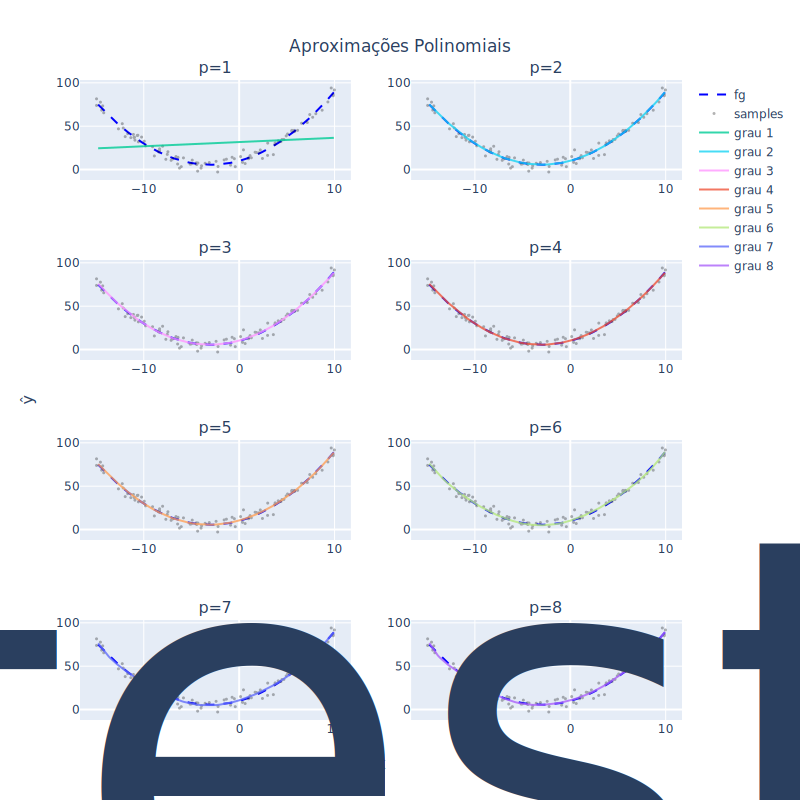

In [201]:
N_train = 100

x_train = np.random.default_rng().uniform(-15, 10, (N_train,1))
x_test = np.sort(np.random.default_rng().uniform(-15, 10, (N_test,1)), axis=0)

noise = np.random.default_rng().normal(0, 4, np.shape(x_train))
y_train  = fg(x_train) + noise
y_test = fg(x_test)

fig4 = make_subplots(rows=4, cols=2, y_title = 'ŷ', 
                     x_title = 'x<sub>test</sub>', 
                     subplot_titles= tuple('p='+str(i) for i in range(1,9)))
fig4.update_layout(autosize = False, width = 800, height = 800, 
                   margin=dict(l = 80, r = 80, t = 80, b = 80),
                   title = dict(text = 'Aproximações Polinomiais', x = 0.5,
                   y = 0.95))

# Compute approximation for n= 1,...,8 polynomial degree
for i in range(1,9):
    powers = np.arange(0,i+1)
    H = np.array(list(map(lambda x: x**powers, x_train.flatten())))
    H_pseudoinv = np.linalg.pinv(H)
    w = H_pseudoinv @ y_train
    H_test = np.array(list(map(lambda x: x**powers, x_test.flatten())))
    y_hat = H_test @ w

    # Plot fg, samples and y_hat
    fg_plot = go.Scatter(x = x_test.flatten(), y = y_test.flatten(), 
                         mode='lines', name = 'fg', 
                         line = dict(color = 'blue', dash = 'dash'), 
                         showlegend= (i==1) )
    sample = go.Scatter(x = x_train.flatten(), y=y_train.flatten(), 
                        mode = 'markers', name = 'samples',
                        marker = dict(color = 'black', symbol = 'circle',
                        size = 3), showlegend = (i == 1), opacity = 0.3)         
    fig4.add_trace(fg_plot, row = int(np.ceil(i/2)), col = 2**(1 - i%2))
    fig4.add_trace(sample, row = int(np.ceil(i/2)), col = 2**(1 - i%2))
    fig4.add_trace(go.Scatter(x = x_test.flatten(), y = y_hat.flatten(), 
                              mode = 'lines', name = 'grau '+str(i), 
                              opacity = 0.8), row = int(np.ceil(i/2)),
                              col = 2**(1 - i%2) )

fig4.show(renderer = 'svg', width = 800, height = 800)

Com o aumento das amostras de treino, houve grande melhora para as aproximações que sofriam de *overfitting*, sendo agora todas as aproximações de grau maior que 1 bastante parecidas.